<a href="https://colab.research.google.com/github/melinalessa/Machine_Learning/blob/main/Introducao_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exercício 1

Construir um modelo preditivo para o dataset fetch_california_housing.
- Visualize os coeficientes e avalie a precisão do modelo (variância R^2) e o erro residual

In [40]:
#importar o conjunto de dataset do sklearn
from sklearn import datasets
#diminuir o erro no teste fazendo embaralhamento das informacoes
from sklearn.model_selection import train_test_split
#importar regressao linear
from sklearn.linear_model import LinearRegression
#visualizar a reta
from matplotlib import pyplot as plt
import numpy as np
#salvar o modelo
import joblib

In [41]:
bd= datasets.fetch_california_housing(as_frame=True)
bd

{'data':        MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
 0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
 1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
 2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
 3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
 4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
 ...       ...       ...       ...        ...         ...       ...       ...   
 20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
 20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
 20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
 20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
 20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   
 
        Longitude 

In [42]:
y= bd.target #target:rotulacao pq é supervisionado
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

In [43]:
bd.target.mean()

2.068558169089147

In [44]:
bd.target.max()

5.00001

In [45]:
bd.target.min()

0.14999

In [46]:
bd.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [47]:
X= bd.data #conjunto de dados completos
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


####Separar o conjunto de treino e teste
####random_states serve pra determinar o embaralhamento dos teste (train=treinamento) e ter um dado unico toda vez que aplicar - qualquer numero positivo.
####as variáveis tem que ser na order abaixo

In [48]:
#train_size (treinamento) e test_size (teste)
#random_state: semente aleatória (qualqer numero inteiro positivo)
train, test, train_target, test_target= train_test_split(X,y, train_size=0.7, random_state=1)

In [49]:
train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
5592,3.1779,41.0,4.394737,1.054825,1658.0,3.635965,33.80,-118.26
2110,2.5111,49.0,4.886792,0.964361,1290.0,2.704403,36.75,-119.75
13901,2.5405,15.0,6.444651,1.422326,2568.0,2.388837,34.06,-116.56
18425,4.5033,7.0,5.291789,1.101173,1739.0,2.549853,37.26,-121.83
6475,2.9196,33.0,4.824528,1.090566,1715.0,3.235849,34.09,-118.08
...,...,...,...,...,...,...,...,...
10955,1.7823,17.0,4.055046,1.087156,1079.0,2.474771,33.76,-117.88
17289,8.5608,42.0,6.788462,1.011538,753.0,2.896154,34.42,-119.63
5192,1.1326,42.0,4.890785,1.006826,775.0,2.645051,33.93,-118.26
12172,2.6322,10.0,4.991614,0.951782,1323.0,2.773585,33.73,-117.16


In [50]:
test_target

4712     3.550
2151     0.707
15927    2.294
82       1.125
8161     2.254
         ...  
2523     0.875
18897    1.098
18878    1.625
4287     1.667
5748     2.387
Name: MedHouseVal, Length: 6193, dtype: float64

In [51]:
modelo= LinearRegression() #criacao de modelo vazio
modelo.fit(train, train_target) #criacao do treinamento

LinearRegression()

In [52]:
#salvar
joblib.dump(modelo,"regressao linear.pkl")

['regressao linear.pkl']

In [53]:
#carregar
joblib.load("regressao linear.pkl")

LinearRegression()

In [54]:
modelo_carregado= joblib.load("regressao linear.pkl")

In [55]:
#peso de todas as variaveis informadas
#visualizar coeficiente
#Y= B0 + B1 * X1
modelo.coef_

array([ 4.41039414e-01,  9.69156499e-03, -1.04748065e-01,  6.21897419e-01,
       -5.66545297e-06, -3.28751453e-03, -4.23159711e-01, -4.37885032e-01])

In [56]:
#estimacao da variancia R^2 (nao tem valor acertavel)
modelo.score(test, test_target)

0.5970870916688178

In [57]:
#erro residual
predicao= modelo.predict(test)
predicao

array([2.12594131, 0.94105584, 2.7104278 , ..., 1.5427789 , 1.51341441,
       1.69167071])

In [58]:
test

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
4712,3.2500,39.0,4.503205,1.073718,1109.0,1.777244,34.06,-118.36
2151,1.9784,37.0,4.988584,1.038813,1143.0,2.609589,36.78,-119.78
15927,4.0132,46.0,4.480296,1.012315,1534.0,3.778325,37.73,-122.42
82,1.5208,52.0,3.908046,1.114943,200.0,2.298851,37.81,-122.28
8161,5.1795,37.0,5.406360,1.024735,711.0,2.512367,33.82,-118.13
...,...,...,...,...,...,...,...,...
2523,3.6429,33.0,6.253731,1.149254,190.0,2.835821,39.65,-122.14
18897,2.5865,47.0,4.681818,1.041958,794.0,2.776224,38.12,-122.25
18878,2.6098,13.0,5.042553,1.104533,2957.0,2.735430,38.07,-122.24
4287,1.7083,29.0,2.898637,1.164395,3432.0,2.923339,34.10,-118.30


In [59]:
#formato bidimensional[[]] - fez a previsao do valor da casa com os dados informados abaixo
modelo.predict([[4,20,10,3,1000,2,30,-100]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([-3.42690319])

In [60]:
#saída esperada= teste_target
#saída real = predicao (modelo.predict)
#diferenca do que era pra ter saido do que realmente saiu
erro_residual= test_target - predicao
erro_residual

4712     1.424059
2151    -0.234056
15927   -0.416428
82      -0.585361
8161    -0.579160
           ...   
2523    -0.521157
18897   -0.758228
18878    0.082221
4287     0.153586
5748     0.695329
Name: MedHouseVal, Length: 6193, dtype: float64

In [61]:
#quanto mais proximo de 0 é acertiva (mesmo que seja negativo)
erro_residual.mean()

-0.021775509772139837

<function matplotlib.pyplot.show(close=None, block=None)>

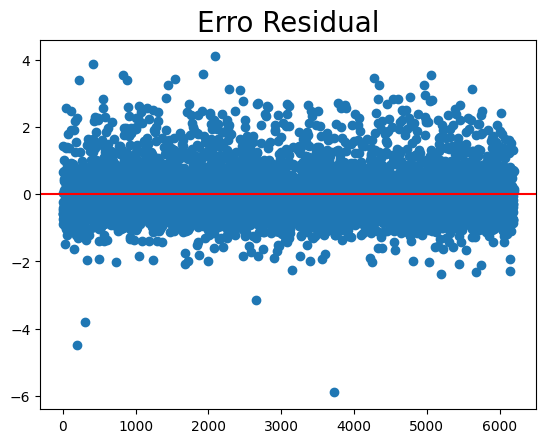

In [62]:
plt.scatter(range(len(erro_residual)), erro_residual)
plt.title("Erro Residual", size=20)
plt.axhline(y=0, color='red')
plt.show

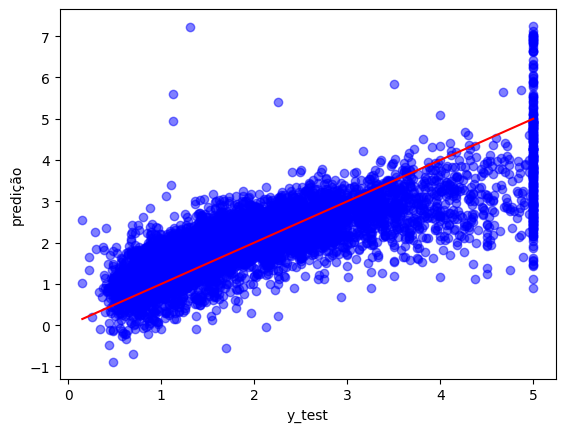

In [70]:
plt.figure()
plt.scatter(test_target, predicao, color= 'blue', alpha= 0.5)
plt.plot([min(test_target), max(test_target)], [min(test_target), max(test_target)], color="red")
plt.xlabel("y_test")
plt.ylabel("predição")
plt.show()